# Image Classification using Convolutional Neural Network (CNN)

Convolutional Neural Network (CNN) is a Deep Learning Algorithm widely used for image classification. This algorithm classifies whether the posted image is acceptable or not acceptable depending upon whether it contains nude or gory content.  

## 1. Importing Libraries

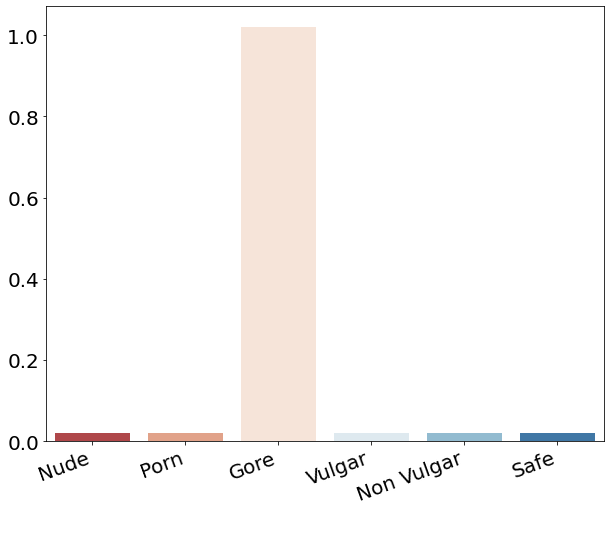

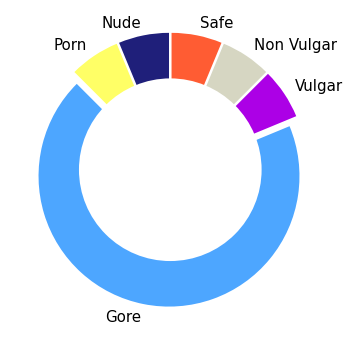

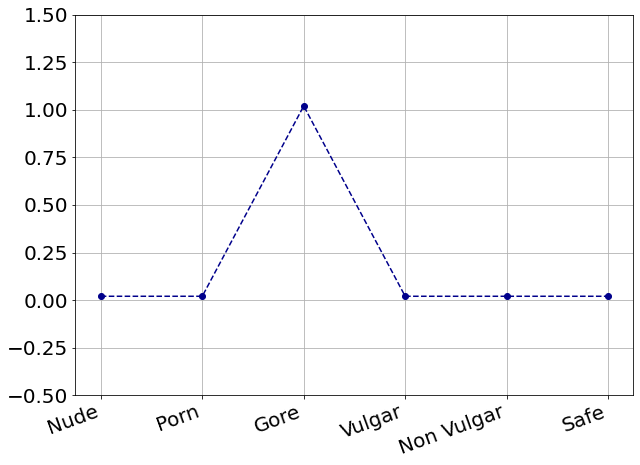

In [8]:
import anvil.server
import anvil.media
import anvil.mpl_util


anvil.server.connect("PJX2AL2HH5JGLC2BLUSKZQMZ-KYSL46SO2Y4TEIKK")

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from PIL import Image
import cv2
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt 

## 2. Loading the Dataset containing Images

In [32]:
train_data_gen = ImageDataGenerator( rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True
                                   )

train_data = train_data_gen.flow_from_directory(
    directory = 'NSFW Test Dataset',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical')

Found 268 images belonging to 6 classes.


## 3. Defining the model architecture

In [34]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=6, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

## 4. Training the model

In [55]:
model.fit_generator(train_data,
                   steps_per_epoch = 100,
                   epochs = 1,
                   )

Epoch 1/1
100/100 [==============================] - 33s 325ms/step - loss: 0.7651 - accuracy: 0.7037


## 5. Saving the model for future use

In [56]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

## 6. Loading the model

In [2]:
model = pickle.load(open(r'finalized_model.sav', 'rb'))

## 7. Classfifying the input as image or video/gif and predicting the classification

Format: Image
<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
[[0. 0. 1. 0. 0. 0.]]
Result: Not Okay


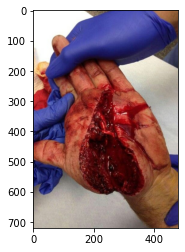

In [3]:
image1 = ['jpg', 'jpeg', 'png','jfif']
video1 = ['mp4', 'gif']
result = 0
#Enter your path to an image
path = r'C:\Users\Sakshi\Documents\Project\Testing\4.jpg'
#path = r'C:\Users\Sakshi\Documents\Data\testing\giphy.gif'
extension = path.split('.')[-1]

if extension in image1:
    print('Format: Image')
    img = Image.open(path)
    plt.imshow(img)
    test_img = keras.preprocessing.image.load_img(path, target_size = (32,32))
    print(type(test_img))
    test_img = tf.keras.preprocessing.image.img_to_array(test_img)
    print(type(test_img))
    test_img = np.expand_dims(test_img, axis = 0)
    result = model.predict(test_img)
    print(result)
    if result[0][4] == 1 or result[0][5] == 1 or [0][0] == 1:
        print('Result: Okay')
    else:
        print('Result: Not Okay') 

if extension in video1:
    print('Format: Video')
    res = []
    vidcap = cv2.VideoCapture(path)
    success, image = vidcap.read()
    count = 0
    while success:
        success,image = vidcap.read()
        if success:
            print('read a new frame:', success)
            count+=1
            images = cv2.resize(image, (32,32),3)
            #images  = images.reshape(32,32,3)
            print(image.shape)
            test_img = np.expand_dims(images, axis = 0)
            result = model.predict(test_img)
            res.append(result)
        else:
            break

    print(len(res))
    okay = 0
    notokay = 0
    for result in res:
        print(res)
        if result[0][4] == 1 or result[0][5] == 1 or [0][0] == 1:
            okay+=1 
        else:
            notokay+=1
    print(okay)
    print(notokay)
    if okay > notokay:
        print('Result: Okay')
    else:
        print('Result: Not Okay')


## Anvil Integration

In [10]:
import anvil.server
import anvil.media
import anvil.mpl_util


anvil.server.connect("PJX2AL2HH5JGLC2BLUSKZQMZ-KYSL46SO2Y4TEIKK")


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from PIL import Image
import cv2
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt 


In [12]:
import pickle
model = pickle.load(open(r'finalized_model.sav', 'rb'))


In [13]:
@anvil.server.callable
def image_processing(path):
    res = []
    imagelen = []
    #path = r'C:\Users\Sakshi\FinalYearProject\NSFW Test Dataset-20200515T145850Z-001\giphy (2).gif'
    #vidcap = cv2.VideoCapture(r'C:\Users\Sakshi\FinalYearProject\NSFW Test Dataset-20200515T145850Z-001\download.jfif')
    with anvil.media.TempFile(path) as filename:
        img = cv2.imread(filename)
    
        if img is not None:

                    print('yes')
                    test_img =  tf.keras.preprocessing.image.load_img(filename, target_size = (32,32))
                    print(type(test_img))
                    test_img =  tf.keras.preprocessing.image.img_to_array(test_img)
                    print(type(test_img))
                    test_img = np.expand_dims(test_img, axis = 0)
                    result = model.predict(test_img)
                    print(result)
                    if result[0][4] == 1 or result[0][5] == 1:
                        print('okay')
                        return ('Result: ', result[0], 'Conclusion:Entered image is good to go ')
                    else:
                        print('not okay')
                        return ('Result: ', result[0], 'Conclusion: Image not accepted')

        else:

                vidcap = cv2.VideoCapture(filename)
                success, image = vidcap.read()
                #print(image.shape)
                count = 0
                while success:
                    success,image = vidcap.read()
                    if success:
                        print('read a new frame:', success)
                        count+=1
                        images = cv2.resize(image, (32,32),3)
                        #images  = images.reshape(32,32,3)
                        #rint(image.shape)
                        test_img = np.expand_dims(images, axis = 0)
                        result = model.predict(test_img)
                        res.append(result)
                    else:
                           break 
                print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
                #print(len(res))
                okay = 0
                notokay = 0
                for result in res:
                    print(res)
                    if result[0][4] == 1 or result[0][5] == 1:
                        okay+=1 
                    else:
                        notokay+=1
                print('Okay Count: ',okay)
                print('Not Okay Count:',notokay)
                if okay > notokay:
                    print('okay')
                    return ('Result: ', result[0], 'Conclusion: Entered video/gif is good to go ')
                else:
                    print('notokay')
                    return ('Result: ', result[0], 'Conclusion: Image not accepted')



            
           



In [14]:
@anvil.server.callable
def get_barplot(result):
    plt.rcParams.update({'font.size': 20})
    print(result)
    plt.figure(figsize=(10,8))
    df = {'Category':['Nude', 'Porn', 'Gore', 'Vulgar','Non Vulgar','Safe'], 'Result':result} 
    df = pd.DataFrame(df)
    sns.barplot(x =df['Category'],y =[x+0.02 for x in df['Result']], palette = sns.color_palette("RdBu", n_colors=6)) 
    plt.xticks(rotation=20, ha="right")  
    plt.xlabel(' ')
    return anvil.mpl_util.plot_image()

@anvil.server.callable
def get_pieplot(result):
    plt.rcParams.update({'font.size': 15})
    df = {'Category':['Nude', 'Porn', 'Gore', 'Vulgar','Non Vulgar','Safe'], 'Result':result} 
    df = pd.DataFrame(df)
    plt.figure(figsize=(6,6))
    labels = ['Nude','Porn','Gore', 'Vulgar','Non Vulgar','Safe']
    y_1 = [x+0.1 for x in df['Result']]
    flatui = [ "#1f1f7a", "#ffff66", "#4da6ff","#ac00e6","#d6d6c2", '#ff5c33']
    sns.set_palette(flatui)
    plt.pie(y_1,labels=labels,startangle=90, colors = sns.color_palette(),explode=[0.05,0.05,0.05,0.05,0.05,0.05])
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    return anvil.mpl_util.plot_image(legend=None)

@anvil.server.callable
def get_lineplot(result):
    plt.rcParams.update({'font.size': 20})
    df = {'Category':['Nude', 'Porn', 'Gore', 'Vulgar','Non Vulgar','Safe'], 'Result':result} 
    df = pd.DataFrame(df)
    plt.figure(figsize=(10,7))
    y =[x+0.02 for x in df['Result']]
    plt.plot(df['Category'],y, color='darkblue', marker='o', linestyle ='--')
    plt.xticks(rotation=20, ha="right") 
    plt.grid(True)
    plt.ylim(-0.5,1.5)
    return anvil.mpl_util.plot_image() 
    
    
    

yes
<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
[[0. 0. 1. 0. 0. 0.]]
not okay
[0, 0, 1, 0, 0, 0]
Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
